In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
plt.style.use('..\informes.mplstyle')

lw_main = 3.5

px2d = lambda x: x*(71/595)  # PiXel a Distancia
b2V = lambda x: (x/255)*5  # Bits a Voltaje

descargar = False

### Posiciones y señales de control

##### Control P

Satura el: 83%
No saturación inferior = 3.5 V
Valor medio = 39.3


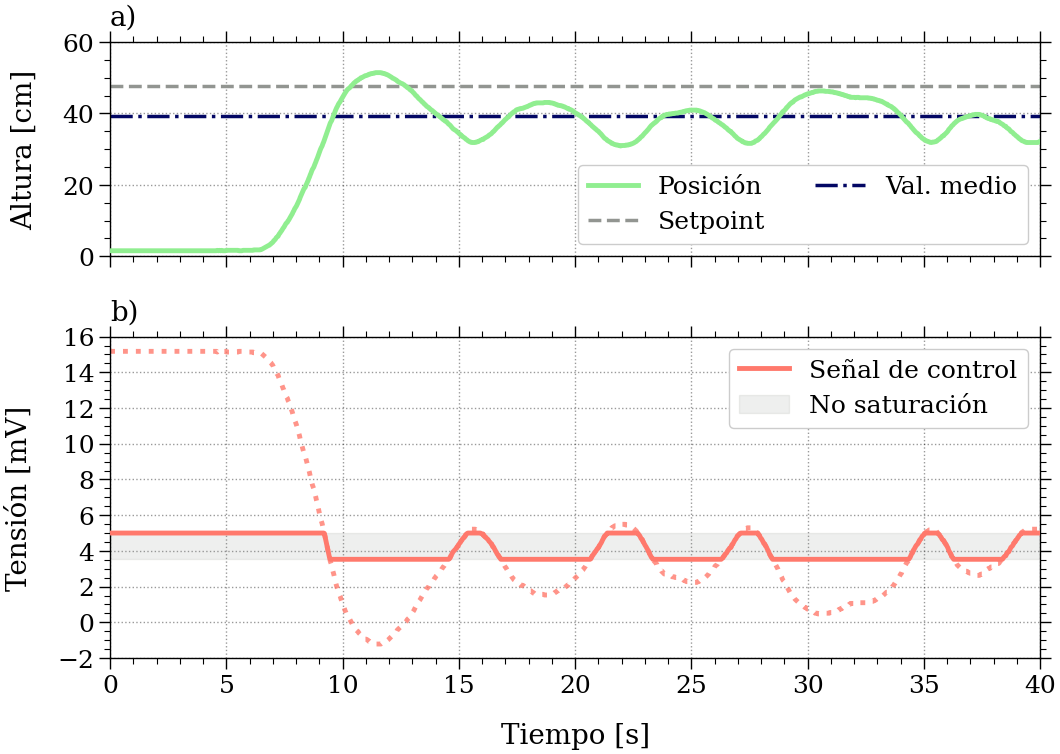

In [2]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0-0-barrido.csv')
df = df[df['Time'] <= (40 - 3.9)]
setpoint = df['Setpoint'][0]

t = df['Time'].values + 3.9
t = np.insert(t, 0, 0)
h = px2d(df['Position'].values)
h = np.insert(h, 0, h[0])
P = b2V(df['P'].values)
P = np.insert(P, 0, P[0])


# PEAKS Y TIEMPO DE SATURACION

peaks = np.array(find_peaks(np.abs(np.diff((P >= 5) | (P <= b2V(180)))), threshold=0.1)[0])
peaks = np.insert(peaks, 0, 0)
peaks = np.append(peaks, len(t)-1)
t_sat = 0
for i in range(0, len(peaks)-1, 2):
    t_sat += t[peaks[i+1]] - t[peaks[i]]

print(f'Satura el: {t_sat*100/t[-1]:.0f}%')
print(f'No saturación inferior = {b2V(180):.1f} V')
val_medio = np.mean(h[np.argmax(h>=px2d(setpoint)):])
print(f'Valor medio = {val_medio:.1f}')


# FIGURA Y AXES

fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [1, 1.5]})
ax[0].set_ylabel('Altura [cm]')
ax[1].set_ylabel('Tensión [mV]')
ax[1].set_xlabel('Tiempo [s]')
ax[0].set_xlim(0, 40)
ax[0].set_ylim(0, 60)
ax[1].set_xlim(0, 40)
ax[1].set_ylim(-2, 16)

ax[1].set_yticks(range(-2, 18, 2))

ax[0].set_title('a)', loc='left', fontsize=20, pad=12)
ax[1].set_title('b)', loc='left', fontsize=20, pad=12)


# PLOTS

# Posicion vs tiempo
ax[0].plot(t, h, lw=lw_main, label='Posición', zorder=5)

# Señal de control vs tiempo
ax[1].plot(t, P, c='C3', ls=':', lw=lw_main, alpha=0.8)
P[P < b2V(180)] = b2V(180)
P[P > 5] = 5
ax[1].plot(t, P, c='C3', lw=lw_main, label='Señal de control', zorder=5)

# Setpoint y zona de no saturacion
ax[0].axhline(px2d(setpoint), c='C9',
              ls='--', label='Setpoint')
ax[0].axhline(val_medio, c='xkcd:darkblue',
              ls='dashdot', label='Val. medio')
ax[1].fill_between([0, 45], 2*[b2V(180)], 2*[5], color='C9',
                   alpha=0.15, label='No saturación')


ax[0].legend(loc='lower right', ncols=2)
ax[1].legend(loc='upper right')
fig.subplots_adjust(hspace=.3)
if descargar:
    fig.savefig('.\Figuras\P')
plt.show()

##### Control PI

Satura el 46%
Valor medio = 48.0


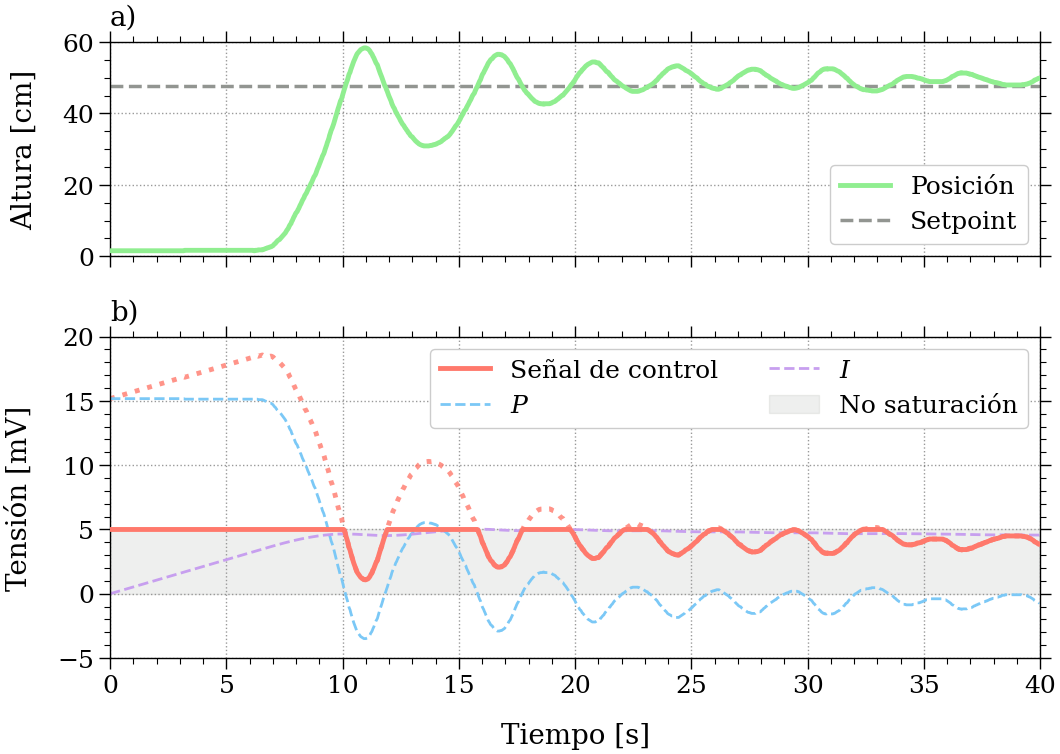

In [3]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-0-barrido.csv')
df = df[df['Time'] <= 40]
setpoint = df['Setpoint'][0]

t = df['Time'].values
h = px2d(df['Position'].values)
P = b2V(df['P'].values)
I = b2V(df['I'].values)
PI = P + I


# PEAKS Y TIEMPO DE SATURACION

peaks = np.array(find_peaks(np.abs(np.diff((PI >= 5) | (PI <= 0))), threshold=0.1)[0])
peaks = np.insert(peaks, 0, 0)
t_sat = 0
for i in range(0, len(peaks)-1, 2):
    t_sat += t[peaks[i+1]] - t[peaks[i]]

print(f'Satura el {t_sat * 100 / t[-1]:.0f}%')
print(f'Valor medio = {np.mean(h[np.argmax(h>=px2d(setpoint)):]):.1f}')


# FIGURA Y AXES

fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [1,1.5]})
ax[0].set_ylabel('Altura [cm]')
ax[1].set_ylabel('Tensión [mV]')
ax[1].set_xlabel('Tiempo [s]')
ax[0].set_xlim(0, 40)
ax[0].set_ylim(0, 60)
ax[1].set_xlim(0, 40)
ax[1].set_ylim(-5, 20)

ax[0].set_title('a)', loc='left', fontsize=20, pad=12)
ax[1].set_title('b)', loc='left', fontsize=20, pad=12)


# PLOTS

# Posicion vs tiempo (MAIN)
ax[0].plot(t, h, lw=lw_main, label='Posición', zorder=5)
# PI (MAIN)
ax[1].plot(t, PI, c='C3', ls=':', lw=lw_main, alpha=0.8)
PI[PI < 0] = 0
PI[PI > 5] = 5
ax[1].plot(t, PI, c='C3', lw=lw_main, label='Señal de control', zorder=5)

ax[1].plot(t, P, '--', c='C1', label=r'$P$',lw=2)  # P

ax[1].plot(t, I, '--', c='C2', label=r'$I$',lw=2)  # I

# Setpoint y zona de no saturacion
ax[0].axhline(px2d(setpoint), c='C9',
              ls='--', label='Setpoint')
ax[1].fill_between([0, 40], 2*[0], 2*[5], color='C9',
                   alpha=0.15, label='No saturación')


fig.subplots_adjust(hspace=.3)
ax[0].legend(loc='lower right')
ax[1].legend(loc='upper right', ncols=2)
if descargar:
    fig.savefig('.\Figuras\PI')
plt.show()

##### Control PID

Satura el 22%
Valor medio = 48.9


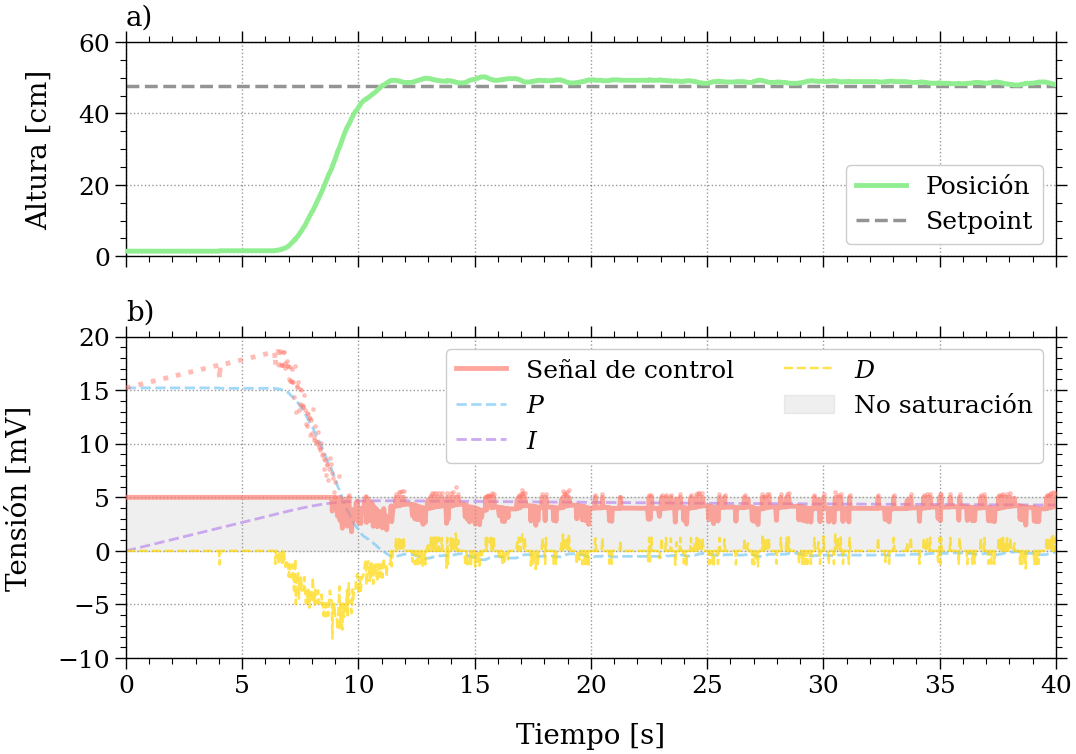

In [4]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
df = df[df['Time'] <= 40]
setpoint = df['Setpoint'][0]

t = df['Time'].values
h = px2d(df['Position'].values)
P = b2V(df['P'].values)
I = b2V(df['I'].values)
D = b2V(df['D'].values)
PID = P + I + D


# TIEMPO DE SATURACION

print(f'Satura el {t[np.argmax(PID < 5)] * 100 / t[-1]:.0f}%')
print(f'Valor medio = {np.mean(h[np.argmax(h>=px2d(setpoint)):]):.1f}')


# FIGURA Y AXES

fig, ax = plt.subplots(2, 1, figsize=(12,8), sharex=True, gridspec_kw={'height_ratios': [1, 1.5]})
ax[0].set_ylabel('Altura [cm]')
ax[1].set_ylabel('Tensión [mV]')
ax[1].set_xlabel('Tiempo [s]')
ax[0].set_xlim(0, 40)
ax[0].set_ylim(0, 60)
ax[1].set_xlim(0, 40)
ax[1].set_ylim(-10, 20)

ax[0].set_title('a)', loc='left', fontsize=20, pad=12)
ax[1].set_title('b)', loc='left', fontsize=20, pad=12)


# PLOTS

# Posicion vs tiempo (MAIN)
ax[0].plot(t, h, lw=lw_main, label='Posición', zorder=5)

# PID (MAIN)
# Saturado
PID_sat = PID[PID > 5][185:]
t_sat = t[PID > 5][185:]
ax[1].plot(t[:185], PID[:185], c='C3', ls=':', alpha=0.5, lw=lw_main, zorder=5)
ax[1].plot(t_sat, PID_sat, '.', c='C3', markersize=5, alpha=0.35, zorder=5)
# No saturado
PID[PID < 0] = 0
PID[PID > 5] = 5
ax[1].plot(t, PID, c='C3', label='Señal de control', alpha=0.65, lw=lw_main, zorder=5)

ax[1].plot(t, P, '--', c='C1', label=r'$P$', alpha=0.7, lw=2)  # P

ax[1].plot(t, I, '--', c='C2', label=r'$I$', alpha=0.9, lw=2)  # I

ax[1].plot(t, D, '--', c='C4', label=r'$D$', alpha=0.7, lw=1.75)  # D

# Setpoint y zona de no saturacion

ax[0].axhline(px2d(setpoint), c='C9',
              ls='--', label='Setpoint')
ax[1].fill_between([0, 45], 2*[0], 2*[5], color='C9',
                   alpha=0.15, label='No saturación')


fig.subplots_adjust(hspace=.3)
ax[0].legend(loc='lower right')
ax[1].legend(loc='upper right', ncols=2)
if descargar:
    fig.savefig('.\Figuras\PID')
plt.show()

##### PID: Diferencia entre setpoint establecido y setpoin real

In [5]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
setpoint = px2d(df['Setpoint'][0])
df = df[(df['Time'] <= 40) & (df['Time'] >= 12.5)]

h = px2d(df['Position'].values)

setpoint_r = np.mean(h)

print(f'Setpoint establecido: {setpoint:.5f}')
print(f'Setpoint real: {setpoint_r:.5f}')

print(f'{setpoint/setpoint_r * 100:.1f}%')

Setpoint establecido: 47.73109
Setpoint real: 48.94204
97.5%


### Distintos valores de $k_p$, $k_i$ y $k_d$

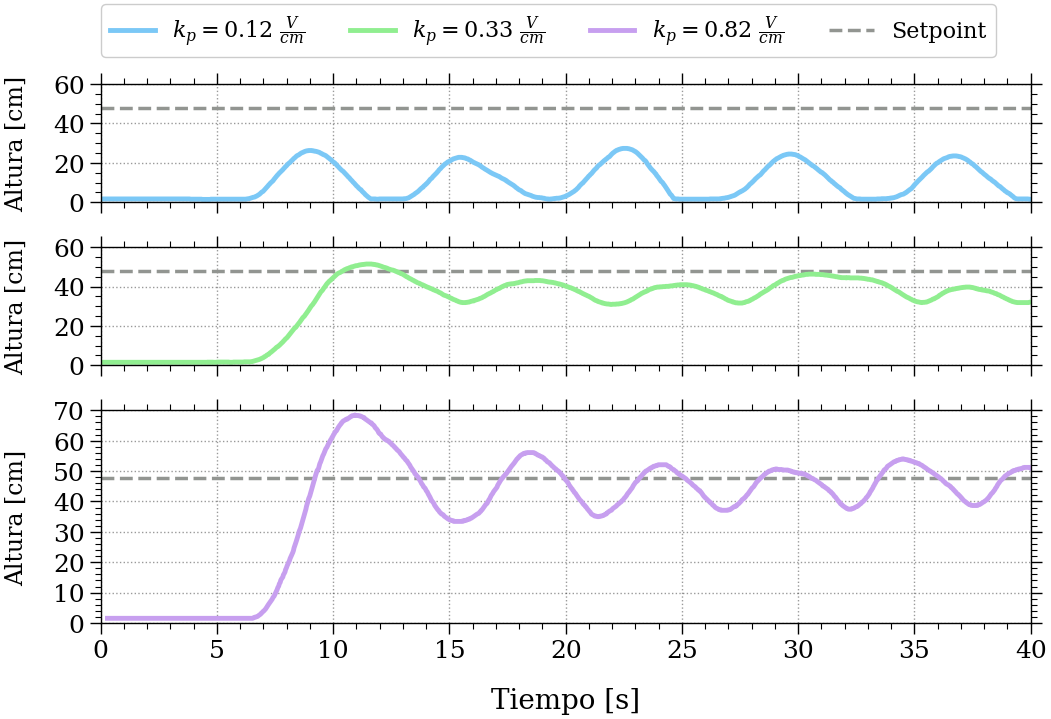

In [6]:
df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0-0-barrido.csv')
t2 = df['Time'].values + 3.9
t2 = np.insert(t2, 0, 0)
h2 = px2d(df['Position'].values)
h2 = np.insert(h2, 0, h2[0])

df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-0.7-0-0-barrido.csv')
t07 = df['Time'].values + 0.1
h07 = px2d(df['Position'].values)

df = pd.read_csv(fr'..\Mediciones\Clase 2\crtl_P_Kp5min2.csv', header=None, names=['Time', 'Position', 'P'])
t5 = df['Time'].values - 1.8
h5 = px2d(df['Position'].values)*1.46 + h2[0]


fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 7), gridspec_kw={'height_ratios': [1, 1, 1.8]})
axtop, axmed, axbot = ax
axbot.set_xlabel('Tiempo [s]')
axtop.set_ylim(0,60)
axmed.set_ylim(0,60)
axbot.set_ylim(0,70)
axtop.set_yticks(range(0, 61, 20))
axmed.set_yticks(range(0, 61, 20))
axbot.set_yticks(range(0, 71, 10))

# Top
axtop.axhline(px2d(400), c='C9', ls='--')
# axtop.plot(t5, h5, c='C9', alpha=0.3)
# axtop.plot(t2, h2, c='C9', alpha=0.3)
axtop.plot(t07, h07, lw=lw_main, label=r'$k_p = 0.12 \ \frac{V}{cm}$', c='C1')

# Med

axmed.axhline(px2d(400), c='C9', ls='--')
# axmed.plot(t07, h07,  c='C9', alpha=0.3)
# axmed.plot(t5, h5, c='C9', alpha=0.3)
axmed.plot(t2, h2, lw=lw_main, label=r'$k_p = 0.33 \ \frac{V}{cm}$', c='C0')

# Bot

axbot.axhline(px2d(400), c='C9', ls='--')
# axbot.plot(t07, h07,  c='C9', alpha=0.3)
# axbot.plot(t2, h2, c='C9', alpha=0.3)
axbot.plot(t5, h5, lw=lw_main, label=r'$k_p = 0.82 \ \frac{V}{cm}$', c='C2')

plot_setpoint = axbot.axhline(px2d(400), c='C9', ls='--', label='Setpoint')

plt.subplots_adjust(hspace=0.3)
for ax_i in ax:
    ax_i.set_ylabel('Altura [cm]', fontsize=17)
    ax_i.set_xlim(0, 40)
    # ax_i.set_ylim(0, 70)
    # # ax_i.legend()
    # ax_i.set_yticks(range(0, 71, 10))
fig.legend(bbox_to_anchor=(0.88, 1.01), ncol=4, fontsize=16)
plot_setpoint.set_visible(False)
if descargar:
    fig.savefig('.\Figuras\P_3kp')
plt.show()

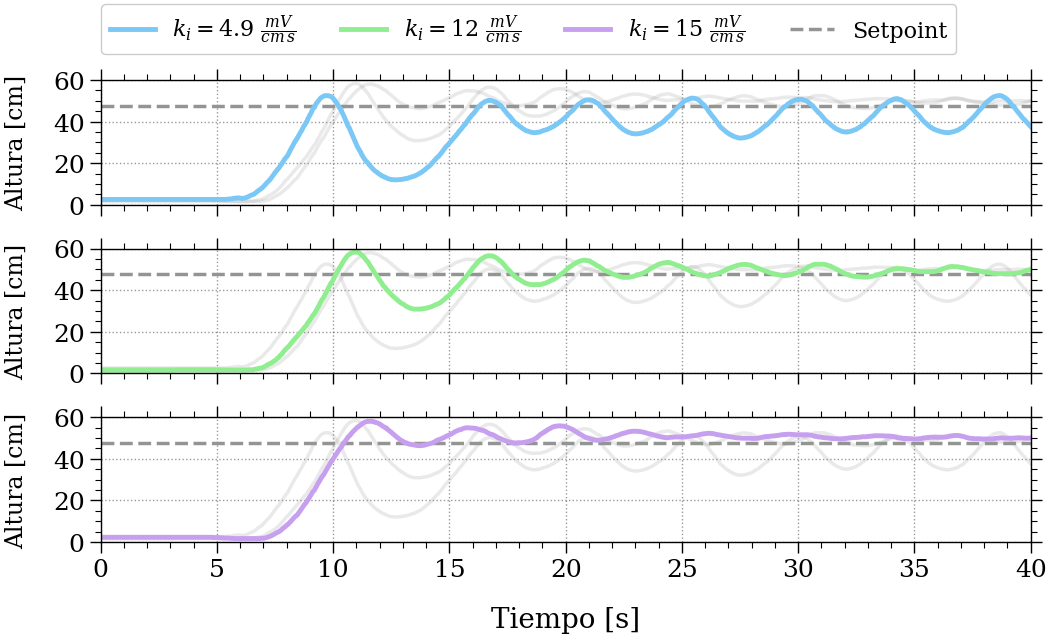

In [7]:
df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.03-0-barrido.csv')
tlow = df['Time'].values
hlow = px2d(df['Position'].values)

df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.07-0-barrido.csv')
tright = df['Time'].values
hright = px2d(df['Position'].values)

df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.09-0-barrido.csv')
thigh = df['Time'].values
hhigh = px2d(df['Position'].values)


fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 6))
axtop, axmed, axbot = ax
axbot.set_xlabel('Tiempo [s]')

# Top
axtop.axhline(px2d(400), c='C9', ls='--')
axtop.plot(thigh, hhigh, c='C9', alpha=0.2)
axtop.plot(tright, hright, c='C9', alpha=0.2)
axtop.plot(tlow, hlow, lw=lw_main, label=r'$k_i = 4.9 \ \frac{mV}{cm \, s}$', c='C1')

# Med

axmed.axhline(px2d(400), c='C9', ls='--')
axmed.plot(tlow, hlow,  c='C9', alpha=0.2)
axmed.plot(thigh, hhigh, c='C9', alpha=0.2)
axmed.plot(tright, hright, lw=lw_main, label=r'$k_i = 12 \ \frac{mV}{cm \, s}$', c='C0')

# Bot

axbot.axhline(px2d(400), c='C9', ls='--')
axbot.plot(tright, hright,  c='C9', alpha=0.2)
axbot.plot(tlow, hlow, c='C9', alpha=0.2)
axbot.plot(thigh, hhigh, lw=lw_main, label=r'$k_i = 15 \ \frac{mV}{cm \, s}$', c='C2')

plot_setpoint = axbot.axhline(px2d(400), c='C9', ls='--', label='Setpoint')

plt.subplots_adjust(hspace=0.35)
for ax_i in ax:
    ax_i.set_ylabel('Altura [cm]', fontsize=17)
    ax_i.set_xlim(0, 40)
    ax_i.set_ylim(0, 60)
    # ax_i.legend()
    ax_i.set_yticks(range(0, 61, 20))
fig.legend(bbox_to_anchor=(0.847, 1.025), ncol=4, fontsize=16)
plot_setpoint.set_visible(False)
if descargar:
    fig.savefig('.\Figuras\PI_3ki')
plt.show()

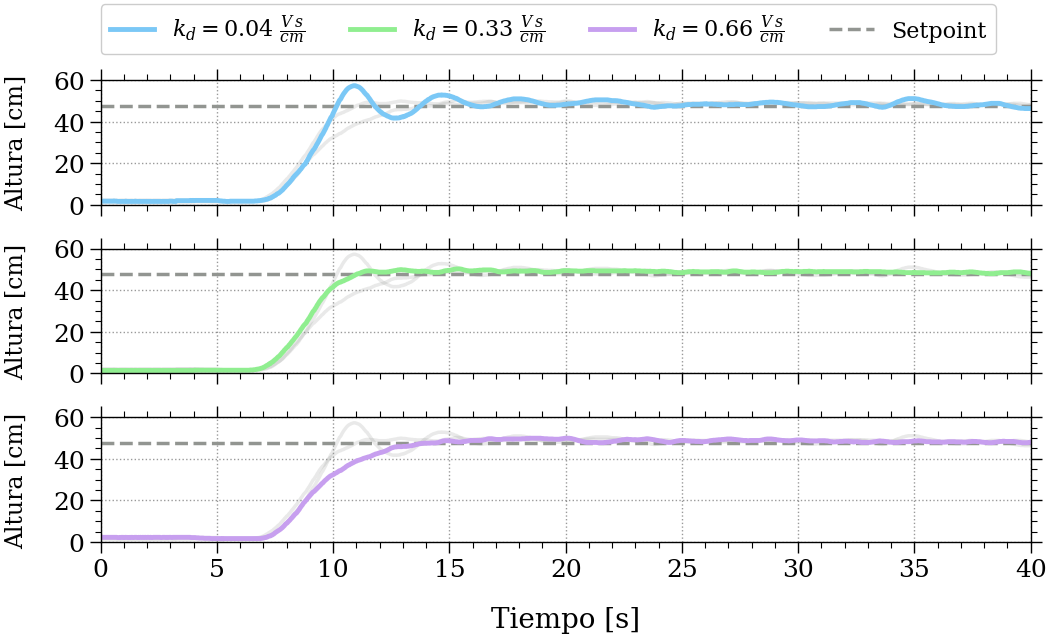

In [8]:
df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.07-0.25-barrido.csv')
tlow = df['Time'].values
hlow = px2d(df['Position'].values)

df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
tright = df['Time'].values
hright = px2d(df['Position'].values)

df = pd.read_csv(fr'..\Mediciones\Clase 3\PID\PID-2-0.07-4-barrido.csv')
thigh = df['Time'].values
hhigh = px2d(df['Position'].values)


fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 6))
axtop, axmed, axbot = ax
axbot.set_xlabel('Tiempo [s]')

# Top
axtop.axhline(px2d(400), c='C9', ls='--')
axtop.plot(thigh, hhigh, c='C9', alpha=0.2)
axtop.plot(tright, hright, c='C9', alpha=0.2)
axtop.plot(tlow, hlow, lw=lw_main, label=r'$k_d = 0.04 \ \frac{V \, s}{cm}$', c='C1')

# Med

axmed.axhline(px2d(400), c='C9', ls='--')
axmed.plot(tlow, hlow,  c='C9', alpha=0.2)
axmed.plot(thigh, hhigh, c='C9', alpha=0.2)
axmed.plot(tright, hright, lw=lw_main, label=r'$k_d = 0.33 \ \frac{V \, s}{cm}$', c='C0')

# Bot

axbot.axhline(px2d(400), c='C9', ls='--')
axbot.plot(tright, hright,  c='C9', alpha=0.2)
axbot.plot(tlow, hlow, c='C9', alpha=0.2)
axbot.plot(thigh, hhigh, lw=lw_main, label=r'$k_d = 0.66 \ \frac{V \, s}{cm}$', c='C2')

plot_setpoint = axbot.axhline(px2d(400), c='C9', ls='--', label='Setpoint')

plt.subplots_adjust(hspace=0.35)
for ax_i in ax:
    ax_i.set_ylabel('Altura [cm]', fontsize=17)
    ax_i.set_xlim(0, 40)
    ax_i.set_ylim(0, 60)
    # ax_i.legend()
    ax_i.set_yticks(range(0, 61, 20))
fig.legend(bbox_to_anchor=(0.88, 1.025), ncol=4, fontsize=16)
plot_setpoint.set_visible(False)
if descargar:
    fig.savefig('.\Figuras\PID_3kd')
plt.show()